## Model Evaluation

Now when I had chosen the best solution, I could try it out on a test dataset. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn import metrics

from Classes_And_Functions import *

In [2]:
warnings.filterwarnings('ignore')

I imported the training dataset (*df_1*) I was analyzing in Part 1 along with the NYC Airbnb listings dataset (*df_2*) compiled on 12th February 2020. 

In [3]:
df_1 = pd.read_csv('data/listings_full.csv')
df_2 = pd.read_csv('data/listings_full_02_2020.csv')

As the second DataFrame contains the listings also present in the *df_1* dataset I removed them from the *df_2*, to get a proper test set with completely new data for the model:

In [4]:
ids_1 = list(df_1['id'])
ids_2 = list(df_2['id'])
id_tests = [i for i in ids_2 if i not in ids_1]
df_test = df_2[df_2['id'].isin(id_tests)]   
print(df_test.shape)
df_test.head()

(5712, 106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
9,6021,https://www.airbnb.com/rooms/6021,20200212052319,2020-02-13,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,This is a wonderful pre-war apartment full of ...,GUEST BEDROOM on Central Park West. Beautiful...,This is a wonderful pre-war apartment full of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.94
66,18198,https://www.airbnb.com/rooms/18198,20200212052319,2020-02-13,Little King of Queens,This bright & sunny bedroom is in a shared 3 b...,"This is a small bedroom in a large, quiet, new...",This bright & sunny bedroom is in a shared 3 b...,none,The flat is located on the border of Woodside ...,...,f,f,strict_14_with_grace_period,t,f,2,0,2,0,0.21
79,20913,https://www.airbnb.com/rooms/20913,20200212052319,2020-02-12,Charming 1 bed GR8 WBurg LOCATION!,Two blocks from the subway and SO close to the...,Hello traveler! I am constantly leaving town ...,Two blocks from the subway and SO close to the...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,1.47
99,27006,https://www.airbnb.com/rooms/27006,20200212052319,2020-02-13,Comfortable UWS 2-BD Family-Friendly Brownstone,"Our clean, quiet two bedroom apartment is very...",SPACIOUS 2-BEDROOM MANHATTAN APARTMENT—IDEAL L...,"Our clean, quiet two bedroom apartment is very...",none,"The heart of the Upper West Side, half a block...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.26
111,30031,https://www.airbnb.com/rooms/30031,20200212052319,2020-02-13,NYC artists’ loft with roof deck,"Housed in a converted factory loft, Mothership...",Our guestroom is tiny and bare bones: a conve...,"Housed in a converted factory loft, Mothership...",none,We are located right across the street from a ...,...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,1.77


Having test set generated, I replaced **price** feature with **log_price** column just like in previous parts of this project and divided the dataset to *X_test* and *y_test*:

In [5]:
df_test['price'] = df_test['price'].apply(lambda x: remove_nonnumeric_chars(x))
df_test['price'] = df_test['price'].astype('float')
df_test['log_price'] = df_test['price'].apply(lambda x: np.log(x+1))
df_test.drop(columns=['price'], inplace=True)

y_test = df_test['log_price']
X_test = df_test.drop('log_price', axis=1)

Then, I loaded *preprocessing_pipeline.joblib* into this Notebook and used it on *X_test*:

In [6]:
columns_to_remove = ['last_review',
 'calendar_last_scraped',
 'reviews_per_month',
 'bed_type',
 'availability_30',
 'notes',
 'neighbourhood',
 'room_type',
 'country_code',
 'first_review',
 'calendar_updated',
 'street',
 'host_total_listings_count',
 'host_acceptance_rate',
 'scrape_id',
 'calculated_host_listings_count_private_rooms',
 'host_picture_url',
 'is_business_travel_ready',
 'host_response_rate',
 'experiences_offered',
 'minimum_minimum_nights',
 'maximum_maximum_nights',
 'market',
 'host_is_superhost',
 'availability_60',
 'picture_url',
 'host_response_time',
 'require_guest_profile_picture',
 'interaction',
 'host_url',
 'host_neighbourhood',
 'host_location',
 'review_scores_accuracy',
 'thumbnail_url',
 'maximum_nights',
 'summary',
 'has_availability',
 'number_of_reviews_ltm',
 'city',
 'name',
 'amenities',
 'neighbourhood_group_cleansed',
 'host_thumbnail_url',
 'access',
 'host_name',
 'minimum_nights',
 'host_verifications',
 'maximum_minimum_nights',
 'jurisdiction_names',
 'neighbourhood_cleansed',
 'last_scraped',
 'maximum_nights_avg_ntm',
 'host_about',
 'property_type',
 'listing_url',
 'minimum_nights_avg_ntm',
 'host_listings_count',
 'availability_90',
 'description',
 'house_rules',
 'state',
 'medium_url',
 'space',
 'calculated_host_listings_count_shared_rooms',
 'id',
 'host_has_profile_pic',
 'smart_location',
 'neighborhood_overview',
 'minimum_maximum_nights',
 'review_scores_value',
 'host_id',
 'country',
 'requires_license',
 'review_scores_communication',
 'weekly_price',
 'calculated_host_listings_count_entire_homes',
 'xl_picture_url',
 'is_location_exact',
 'transit',
 'monthly_price',
 'review_scores_checkin',
 'license',
 'require_guest_phone_verification',
 'zipcode',
 'host_since',
 'review_scores_cleanliness',
 'square_feet']



data_compiled_date = pd.Timestamp(2020, 2, 12)

preprocessing_pipeline = load('preprocessing_pipeline.joblib')


X_test_preprocessed = preprocessing_pipeline.transform(X_test)

In [7]:
print(f'Number of empty cells in the test set: {X_test_preprocessed.isnull().sum().sum()}')

Number of empty cells in the test set: 0


Then, I loaded *scaler.joblib* and *model.joblib* files and finally tested the chosen model on the test set:

In [8]:
sc = load('scaler.joblib')
model = load('model.joblib')

X_test_premodelled = sc.transform(X_test_preprocessed)

y_pred = model.predict(X_test_premodelled)
r2 = metrics.r2_score(y_true=y_test, y_pred=y_pred)
mse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

print(f' Test dataset prediction results: -R2:{r2}, MSE: {mse}\n')

 Test dataset prediction results: -R2:0.620845559932064, MSE: 0.2357228164195817



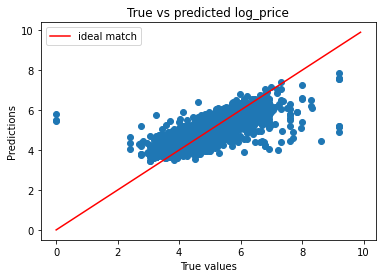

In [9]:
x = np.arange(0, 10 ,0.1)
y = x
plt.plot(x,y, color='r', label='ideal match')
plt.scatter(y_test, y_pred)
plt.title('True vs predicted log_price')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

## Conclusion

The chosen estimator predicted **log_price** values with MSE 0.23. 

It is not a perfect solution, as seen on the graph above, but I managed to find a model that does not tend to overfit the data and therefore is safe to use. There are only a few values which the model had predicted "out of range" whereas the majority of the data are within the area of *ideal_match* line.

This project was the first time when I took completely raw data and went through the whole process of data preprocessing, modelling and applying a solution for the test set.

Choosing the best features out from 106 ones and getting them ready for modelling was a difficult task but I learned a lot about maintaining such a big DataFrame. I will have to improve implementing my preprocessing Pipeline though. 

Selecting a model process have showed me that I still need to seek out more efficient ways to find the best estimators. There is still a lot of room for improvement in that matter. 
For instance, I could have removed outliers from the training set and/or choose certain subsets of features manually and tried out finding a solution on them.

My goal was achieved, however I will definitely go back to this project in the future and try to apply better solutions :)